# Predicting Fire Area Damage

For this assignment, we will be using linear regresion to forecase fire area damage. We will leverage the [Forest Fires Data Set](https://archive.ics.uci.edu/ml/datasets/Forest+Fires) to solve this problem. Additional information regarding this work can be found [Cortez and Morais, 2007](http://www3.dsi.uminho.pt/pcortez/fires.pdf).

Attribute information:

   For more information, read [Cortez and Morais, 2007].

   1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
   2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
   3. month - month of the year: "jan" to "dec" 
   4. day - day of the week: "mon" to "sun"
   5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
   6. DMC - DMC index from the FWI system: 1.1 to 291.3 
   7. DC - DC index from the FWI system: 7.9 to 860.6 
   8. ISI - ISI index from the FWI system: 0.0 to 56.10
   9. temp - temperature in Celsius degrees: 2.2 to 33.30
   10. RH - relative humidity in %: 15.0 to 100
   11. wind - wind speed in km/h: 0.40 to 9.40 
   12. rain - outside rain in mm/m2 : 0.0 to 6.4 
   13. area - the burned area of the forest (in ha): 0.00 to 1090.84 
   (this output variable is very skewed towards 0.0, thus it may make
    sense to model with the logarithm transform). 

In [1]:
import pandas as pd

forestfires = pd.read_csv('forestfires.csv')
forestfires.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


Question 1.1: Using the [describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) method, provide the summary statistics of the data

In [2]:
forestfires.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


Question 1.2: Apply log(area+1) to the data

In [3]:
import numpy as np

forestfires['log(area+1)'] = np.log1p(forestfires['area'])
forestfires.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,log(area+1)
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0.0


Question 2.1: Visually explore the data using pairplot.

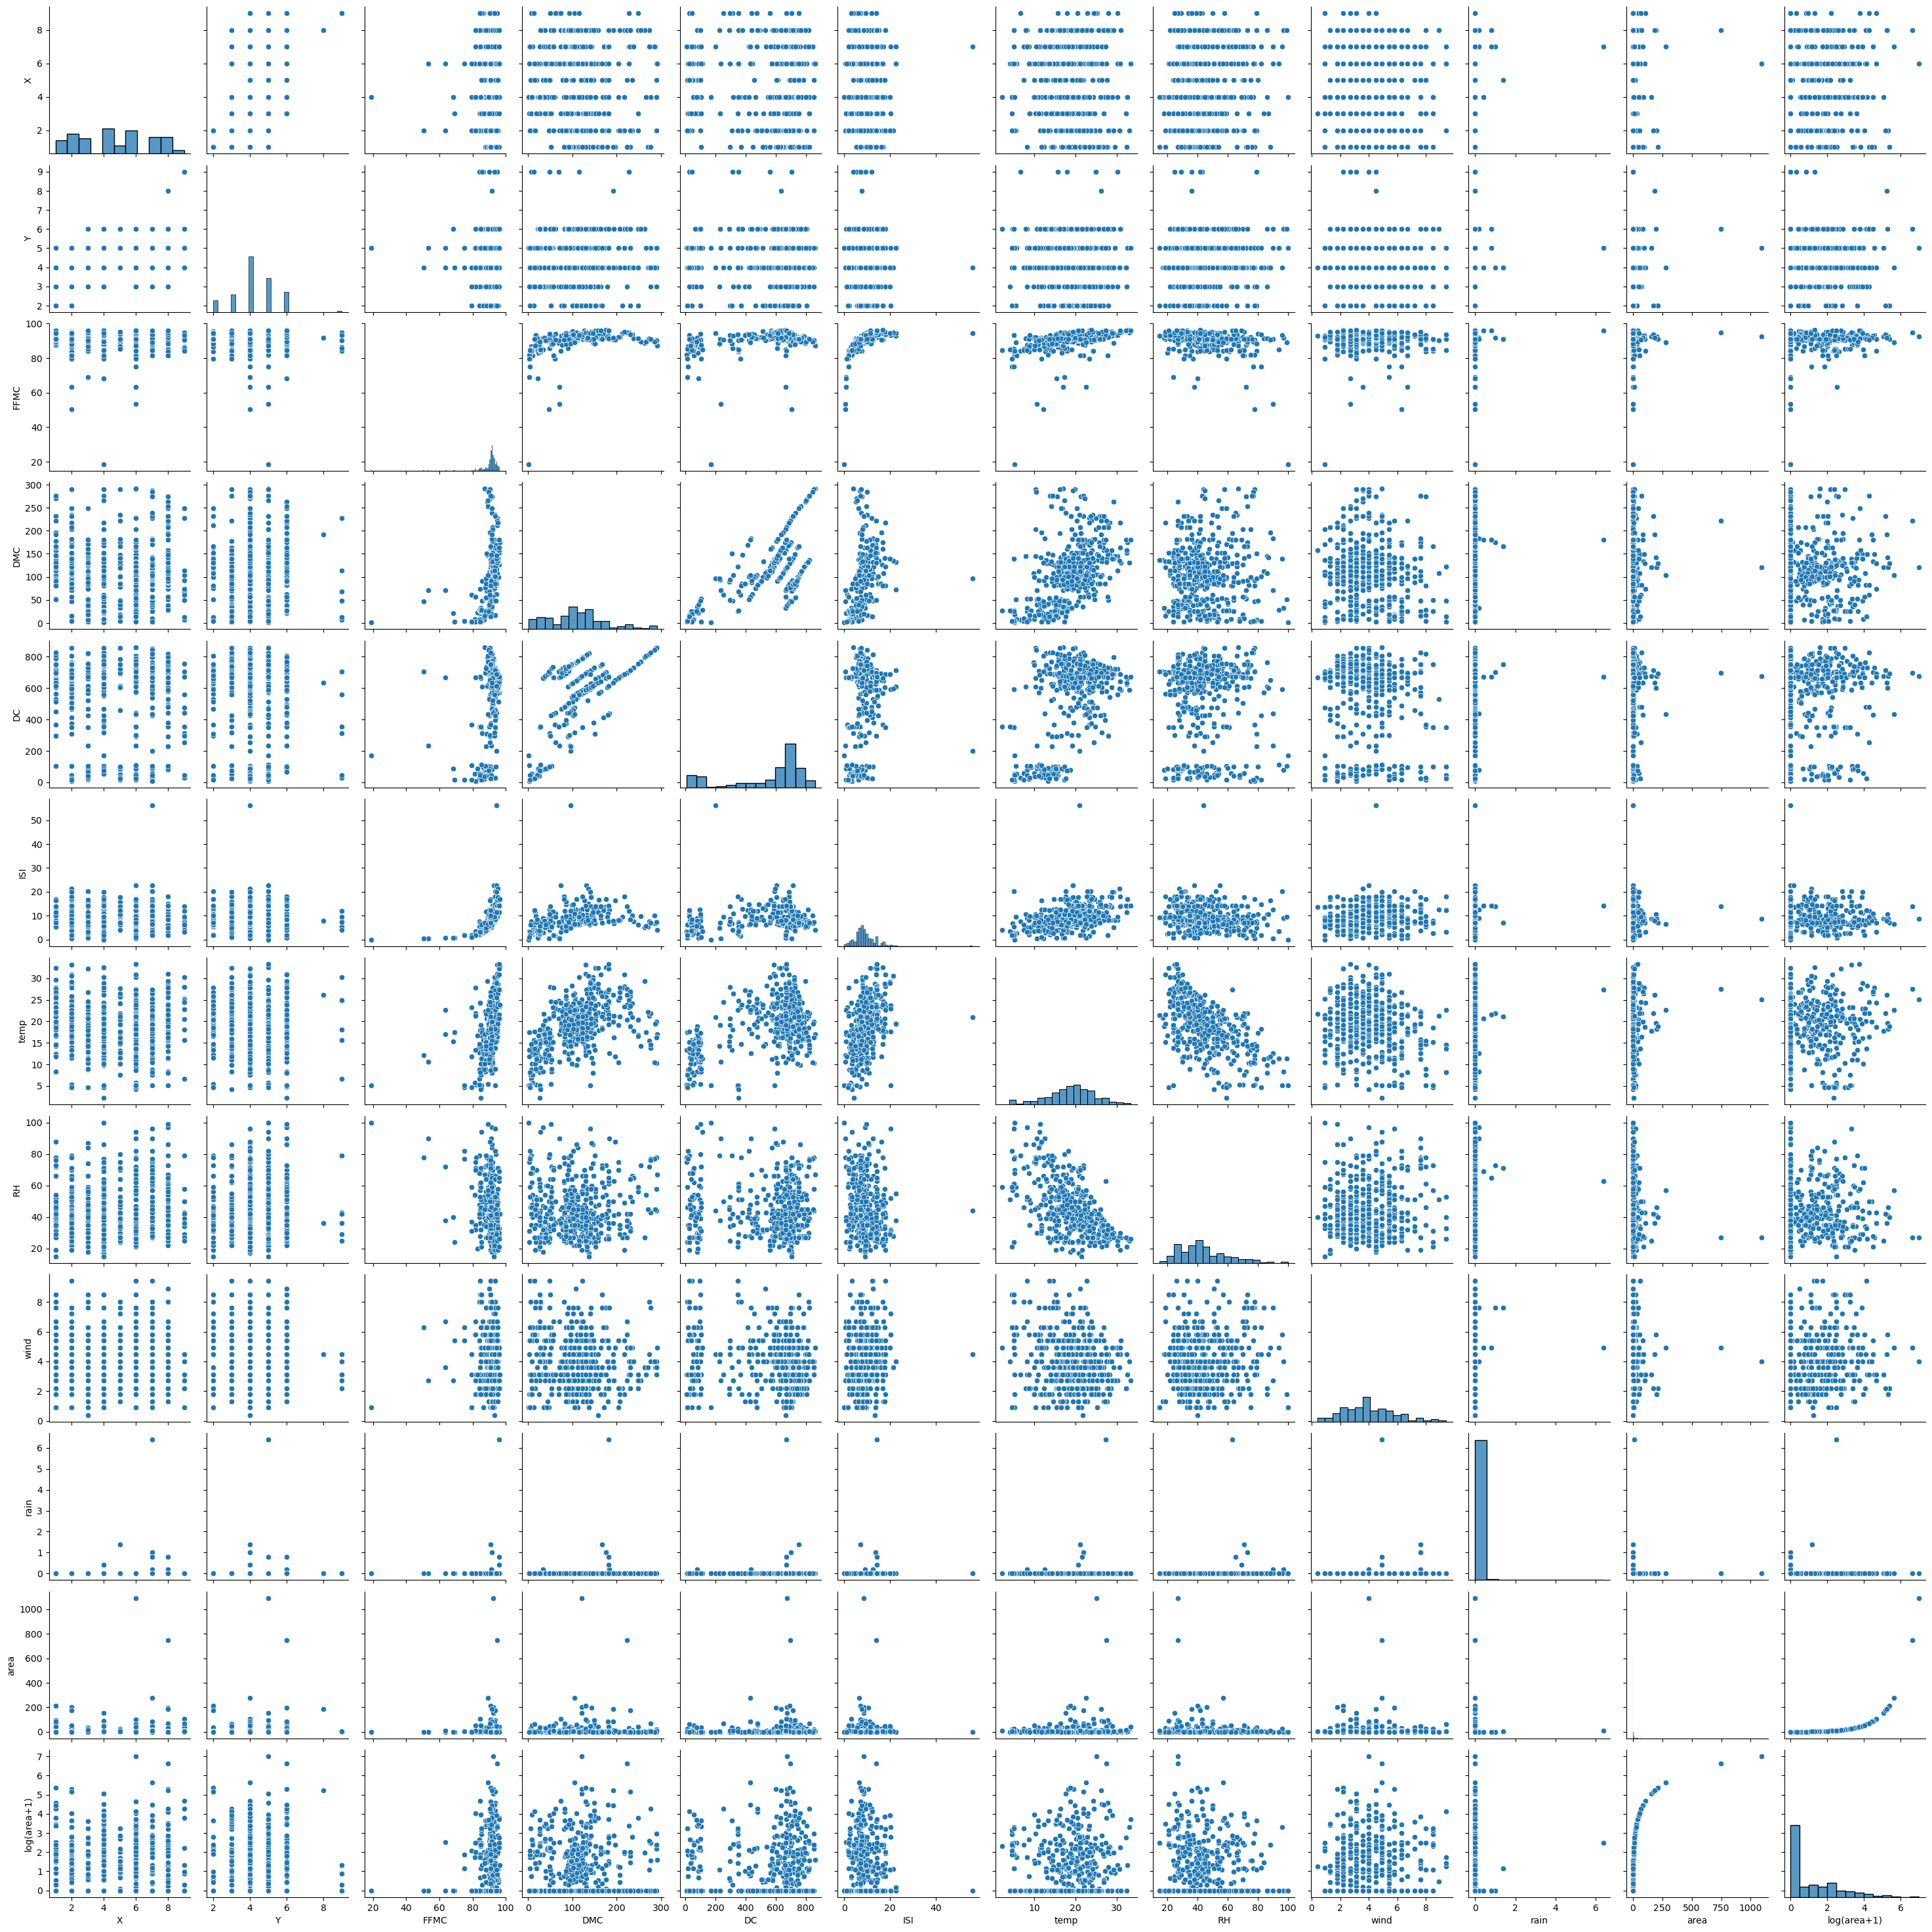

In [4]:
import seaborn as sns
%matplotlib inline

sns.pairplot(forestfires)

Question 2.2: Zoom in at the rain vs area by plotting the scatter plot. What do you conclude?

<AxesSubplot:xlabel='rain', ylabel='log(area+1)'>

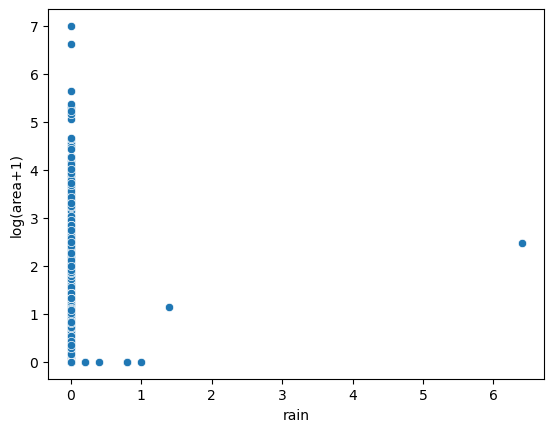

In [5]:
sns.scatterplot(data=forestfires, x="rain", y="log(area+1)")

There isn't many instances where it rains during the fire, but when it does, it limits the area spread given that we remove the two outlier points where rain is greater than 1mm

In [6]:
# Dropping the area column since log(area+1) column contains the same transformed data
forestfires.drop(['area'], axis=1, inplace=True)
rain_greater_than_1 = forestfires[(forestfires['rain'] > 1)].index
# Dropping the outliers
forestfires.drop(rain_greater_than_1 , inplace=True)
# forestfires.head()
# forestfires.describe()

Question 4.1: Develop a simple linear regression model, relating area with rain and wind only. Calculate the predict values based on test data.

<AxesSubplot:xlabel='rain', ylabel='wind'>

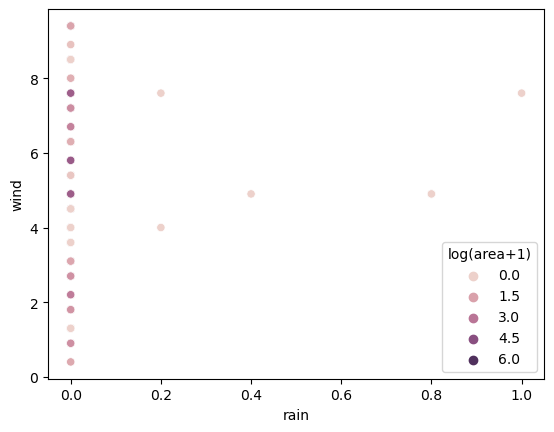

In [7]:
sns.scatterplot(data=forestfires, x="rain", y="wind", hue="log(area+1)")

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Select only wind and rain from predictors
X_1 = forestfires[['wind', 'rain']]
y_1 = forestfires.iloc[:,-1:]

# print(X_1)
# print(y_1)

# Choosing the same split ratio and random state as previous assignment
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.3, random_state=42)
model_simple = LinearRegression().fit(X_train_1, y_train_1)

# Using model to predict y values in test set
y_pred_1 = model_simple.predict(X_test_1)

Question 4.2: Calculate the mean squared error of predict results.

In [9]:
mean_squared_error(y_test_1, y_pred_1)

1.8480745253580175

Question 5.1: Develop a linear regression model, relating area with all features. Calculate the predict values based on test data.

In [10]:
# Transforming day and month non numeric columns to numeric columns by applying cosing transformation
import math
from math import pi

forestfires['day'] = forestfires['day'].map({'fri': 1, 'sat': 2, 'sun': 3, 'mon': 4, 'tue': 5, 'wed': 6, 'thu': 7})
# forestfires.head()

max_value = forestfires['day'].max()
# print(max_value) 

forestfires['day'] = forestfires['day'].apply(lambda x : math.cos((2*pi*x)/max_value))
forestfires.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,log(area+1)
0,7,5,mar,0.623490,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,-0.222521,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,-0.222521,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,0.623490,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,-0.900969,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [11]:
forestfires['month'] = forestfires['month'].map({'mar':1, 'oct':2, 'aug':3, 'sep':4, 'apr':5, 'jun':6, 'jul':7, 'feb':8, 'jan':9, 'dec':10, 'may':11, 'nov':12})
# forestfires.head()

max_value = forestfires['month'].max()
# print(max_value) 

forestfires['month'] = forestfires['month'].apply(lambda x : math.cos((2*pi*x)/max_value))
forestfires.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,log(area+1)
0,7,5,0.866025,0.623490,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,0.500000,-0.222521,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,0.500000,-0.222521,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,0.866025,0.623490,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,0.866025,-0.900969,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [12]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

#find design matrix for linear regression model using 'rating' as response variable
y, X = dmatrices('Q("log(area+1)") ~ X+Y+month+day+FFMC+DMC+DC+ISI+temp+RH+wind+rain', data=forestfires, return_type='dataframe')
#calculate VIF for each explanatory variable
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

#view VIF for each explanatory variable 
# print(vif.loc[(vif['VIF'] >= 5), :])
vif

,VIF,variable
0,512.981867,Intercept
1,1.443761,X
2,1.447872,Y
3,1.287889,month
4,1.043607,day
5,1.715220,FFMC
6,2.393488,DMC
7,2.262110,DC
8,1.587760,ISI
9,2.841598,temp


Going by the ISLR text book which says a VIF value that exceeds 5 or 10 is problematic. There aren't any collinear variables here.

In [13]:
X_2 = forestfires.iloc[:,:-1]
y_2 = forestfires.iloc[:,-1:]
# print(X_2)
# print(y_2)

# Choosing the same split ratio and random state as previous assignment
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=42)
model = LinearRegression().fit(X_train_2, y_train_2)

# Using model to predict y values in test set
y_pred_2 = model.predict(X_test_2)

Question 5.2: Calculate the mean squared error of predict results.

In [14]:
mean_squared_error(y_test_2, y_pred_2)

1.8590404443918542

Using Lesson2_CaseStudy from ISLR to calculate and plot metrics

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
from scipy import stats
from sklearn import datasets
from IPython.display import display, HTML

def lm_stats1(X, y, y_pred):
    """ LEVERAGE & STUDENTISED RESIDUALS
    - https://en.wikipedia.org/wiki/Studentized_residual#How_to_studentize
    """
    # Responses as np array vector
    try: 
        y.shape[1] == 1
        # take first dimension as vector
        y = y.iloc[:,0]
    except:
        pass
    y = np.array(y)
    
    # Residuals
    residuals = np.array(y - y_pred)
    
    # Hat matrix
    H = np.dot(np.dot(X, np.linalg.inv(np.dot(X.T, X))), X.T)
    
    # Leverage
    h_ii = H.diagonal()
    
    ## Externally studentised residual
    # In this case external studentisation is most appropriate 
    # because we are looking for outliers.
    
    # Estimate variance (externalised)
    σi_est = []
    for i in range(X.shape[0]):
        # exclude ith observation from estimation of variance
        external_residuals = np.delete(residuals, i)
        σi_est += [np.sqrt((1 / (X.shape[0] - X.shape[1] - 1)) * np.sum(np.square(external_residuals)))]
    σi_est = np.array(σi_est)
    
    # Externally studentised residuals
    t = residuals / σi_est * np.sqrt(1 - h_ii)
    

    # Return dataframe
    return pd.DataFrame({'residual': residuals,
                         'leverage': h_ii, 
                         'studentised_residual': t,
                         'y_pred': y_pred})


def lm_plot(lm_stats_df): 
    """Provides R style residual plots based on results from lm_stat()"""
    # Parse stats
    t      = lm_stats_df['studentised_residual']
    h_ii   = lm_stats_df['leverage']
    y_pred = lm_stats_df['y_pred']
    
    # setup axis for grid
    plt.figure(1, figsize=(16, 18))
    
    # Studentised residual plot
    plt.subplot(321)
    ax = sns.regplot(x=y_pred, y=t, lowess=True)
    plt.xlabel('Fitted values')
    plt.ylabel('Studentised residuals')
    plt.title('Externally studentised residual plot', fontweight='bold')
    # Draw Hastie and Tibshirani's bounds for possible outliers
    ax.axhline(y=3, color='r', linestyle='dashed')
    ax.axhline(y=-3, color='r', linestyle='dashed');
    
    # Normal Q-Q plot
    plt.subplot(322)
    ax = stats.probplot(t, dist='norm', plot=plt)
    plt.ylabel('Studentised residuals')
    plt.title('Normal Q-Q', fontweight='bold')
    
    # Standardised residuals
    plt.subplot(323)
    ax = sns.regplot(x=y_pred, y=np.sqrt(np.abs(t)), lowess=True)
    plt.xlabel('Fitted values')
    plt.ylabel('√Standardized residuals')
    plt.title('Scale-Location', fontweight='bold')
    
    # Residuals vs Leverage plot
    plt.subplot(324)
    ax = sns.scatterplot(x=h_ii, y=t)
    plt.xlabel('Leverage')
    plt.ylabel('Studentised residuals')
    plt.title('Externally studentised residual vs Leverage', fontweight='bold');

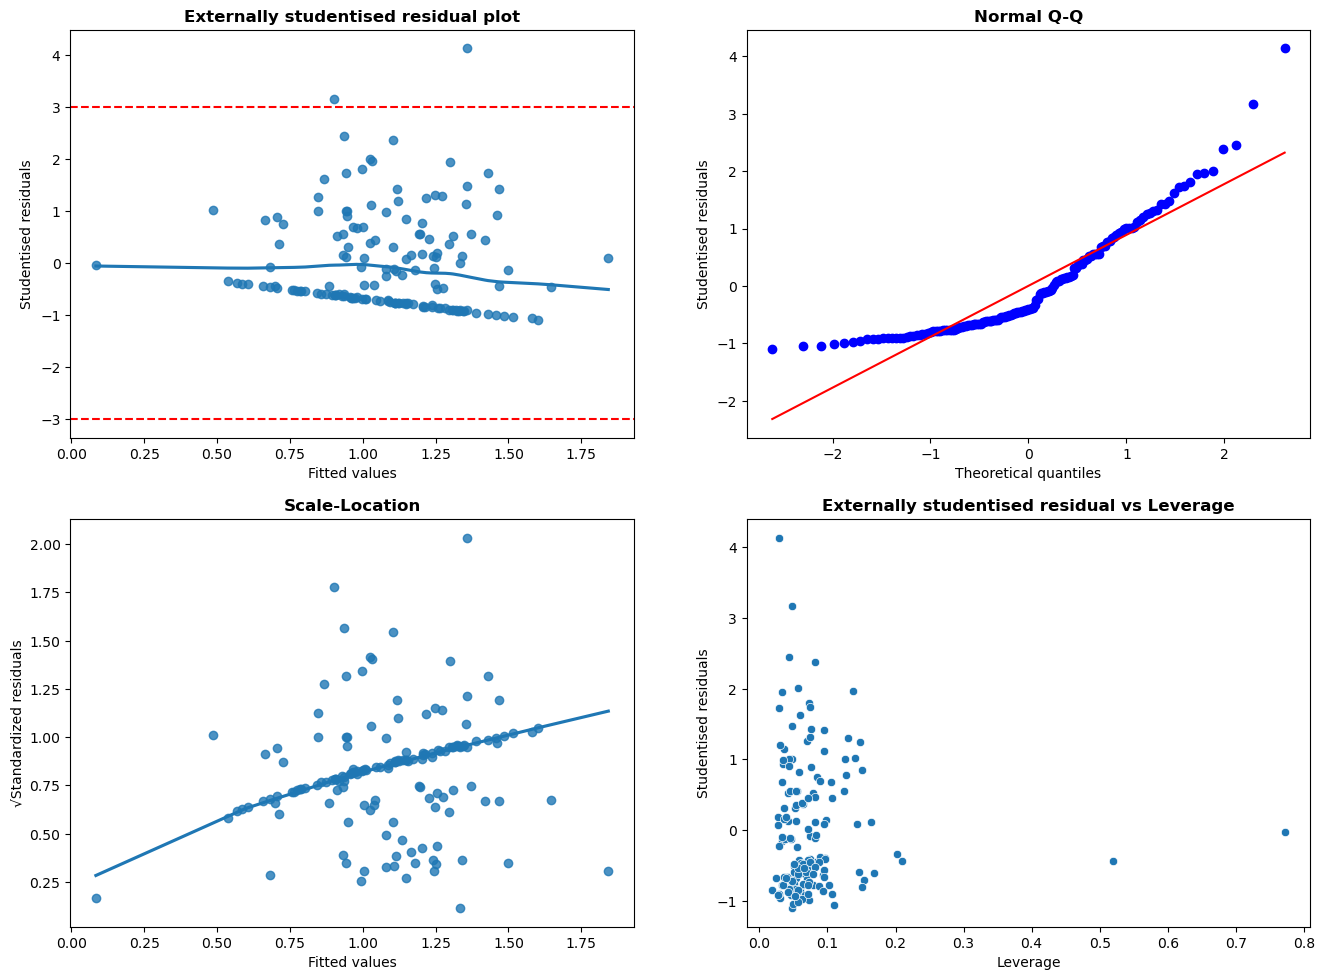

In [16]:
lm_plot(lm_stats1(X_test_2.to_numpy(), y_test_2.squeeze(), pd.Series(y_pred_2.ravel())))

The top-left residual plot suggests that there is a linear relationship that our model. The bottom left Scale-Location plot suggests that a square-root transform might help the linearity allowing the model to achieve an improved fit and mitigate heteroscedasticity.

The top-left plot suggests that there are 2 potential outliers towards the high end of our predicted responses. The bottom-right plot suggests that these outliers have higher leverage and might have a disproportionate affect on the model. Values of around -0.5 and -0.9 might not be outliers in terms of studentised residuals.

The top-right plot does not show normal distribution in residuals.

In [17]:
model_ols = sm.OLS(y_train_2, X_train_2).fit()

print(model_ols.summary())

                                 OLS Regression Results                                
Dep. Variable:            log(area+1)   R-squared (uncentered):                   0.410
Model:                            OLS   Adj. R-squared (uncentered):              0.389
Method:                 Least Squares   F-statistic:                              20.12
Date:                Wed, 15 Feb 2023   Prob (F-statistic):                    2.61e-33
Time:                        17:44:48   Log-Likelihood:                         -627.67
No. Observations:                 360   AIC:                                      1279.
Df Residuals:                     348   BIC:                                      1326.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Commenting on the different statistics printed by the model:

1. R-squared: the value is 0.41 which isn't large enough to indicate the regression model fits the observations
2. F-statistic: the value is 20.12 indicating the Ha hypothesis to be true i.e. at least one of the independant variables is related to y. 
3. p-values: all the values here >0.05 indicating that these variables affect y. I will check for interaction affects, transform input variables (using log1p) to check for better p-values. 

In [18]:
# Let's fit a model with all possible interaction effects

f = 'Q("log(area+1)") ~ X+Y+month+day+FFMC+DMC+DC+ISI+temp+RH+wind+rain\
    + X*Y \
    + X*month \
    + X*day \
    + X*FFMC \
    + X*DMC \
    + X*DC \
    + X*ISI \
    + X*temp \
    + X*RH \
    + X*wind \
    + X*rain \
    + Y*month \
    + Y*day \
    + Y*FFMC \
    + Y*DMC \
    + Y*DC \
    + Y*ISI \
    + Y*temp \
    + Y*RH \
    + Y*wind \
    + Y*rain \
    + month*day \
    + month*FFMC \
    + month*DMC \
    + month*DC \
    + month*ISI \
    + month*temp \
    + month*RH \
    + month*wind \
    + month*rain \
    + day*FFMC \
    + day*DMC \
    + day*DC \
    + day*ISI \
    + day*temp \
    + day*RH \
    + day*wind \
    + day*rain \
    + FFMC*DMC \
    + FFMC*DC \
    + FFMC*ISI \
    + FFMC*temp \
    + FFMC*RH \
    + FFMC*wind \
    + FFMC*rain \
    + DMC*DC \
    + DMC*ISI \
    + DMC*temp \
    + DMC*RH \
    + DMC*wind \
    + DMC*rain \
    + DC*ISI \
    + DC*temp \
    + DC*RH \
    + DC*wind \
    + DC*rain \
    + ISI*temp \
    + ISI*RH \
    + ISI*wind \
    + ISI*rain \
    + temp*RH \
    + temp*wind \
    + temp*rain \
    + RH*wind \
    + RH*rain \
    + wind*rain \
'
y, X = patsy.dmatrices(f, forestfires, return_type='dataframe')
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Q("log(area+1)")   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.9692
Date:                Wed, 15 Feb 2023   Prob (F-statistic):              0.552
Time:                        17:44:55   Log-Likelihood:                -865.74
No. Observations:                 515   AIC:                             1877.
Df Residuals:                     442   BIC:                             2187.
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.9362     22.858     -0.216      0.8

In [19]:
# features which are significant in this model
model.pvalues[model.pvalues < 0.05].sort_values()
# VIF does not suggest multi collinearity but the model warning does. 

Y:DC    0.014109
dtype: float64

In [20]:
f = 'Q("log(area+1)") ~ np.sqrt(X)+np.sqrt(Y)+np.sqrt(month)+np.sqrt(day)+np.sqrt(FFMC)+np.sqrt(DMC)+np.sqrt(DC)+np.sqrt(ISI)+np.sqrt(temp)+np.sqrt(RH)+np.sqrt(wind)+np.sqrt(rain)\
    + np.sqrt(X*Y) \
    + np.sqrt(X*month) \
    + np.sqrt(X*day) \
    + np.sqrt(X*FFMC) \
    + np.sqrt(X*DMC) \
    + np.sqrt(X*DC) \
    + np.sqrt(X*ISI) \
    + np.sqrt(X*temp) \
    + np.sqrt(X*RH) \
    + np.sqrt(X*wind) \
    + np.sqrt(X*rain) \
    + np.sqrt(Y*month) \
    + np.sqrt(Y*day) \
    + np.sqrt(Y*FFMC) \
    + np.sqrt(Y*DMC) \
    + np.sqrt(Y*DC) \
    + np.sqrt(Y*ISI) \
    + np.sqrt(Y*temp) \
    + np.sqrt(Y*RH) \
    + np.sqrt(Y*wind) \
    + np.sqrt(Y*rain) \
    + np.sqrt(month*day) \
    + np.sqrt(month*FFMC) \
    + np.sqrt(month*DMC) \
    + np.sqrt(month*DC) \
    + np.sqrt(month*ISI) \
    + np.sqrt(month*temp) \
    + np.sqrt(month*RH) \
    + np.sqrt(month*wind) \
    + np.sqrt(month*rain) \
    + np.sqrt(day*FFMC) \
    + np.sqrt(day*DMC) \
    + np.sqrt(day*DC) \
    + np.sqrt(day*ISI) \
    + np.sqrt(day*temp) \
    + np.sqrt(day*RH) \
    + np.sqrt(day*wind) \
    + np.sqrt(day*rain) \
    + np.sqrt(FFMC*DMC) \
    + np.sqrt(FFMC*DC) \
    + np.sqrt(FFMC*ISI) \
    + np.sqrt(FFMC*temp) \
    + np.sqrt(FFMC*RH) \
    + np.sqrt(FFMC*wind) \
    + np.sqrt(FFMC*rain) \
    + np.sqrt(DMC*DC) \
    + np.sqrt(DMC*ISI) \
    + np.sqrt(DMC*temp) \
    + np.sqrt(DMC*RH) \
    + np.sqrt(DMC*wind)\
    + np.sqrt(DMC*rain) \
    + np.sqrt(DC*ISI) \
    + np.sqrt(DC*temp) \
    + np.sqrt(DC*RH) \
    + np.sqrt(DC*wind) \
    + np.sqrt(DC*rain) \
    + np.sqrt(ISI*temp) \
    + np.sqrt(ISI*RH) \
    + np.sqrt(ISI*wind) \
    + np.sqrt(ISI*rain) \
    + np.sqrt(temp*RH) \
    + np.sqrt(temp*wind) \
    + np.sqrt(temp*rain) \
    + np.sqrt(RH*wind) \
    + np.sqrt(RH*rain) \
    + np.sqrt(wind*rain) \
'
y, X = patsy.dmatrices(f, forestfires, return_type='dataframe')
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Q("log(area+1)")   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                 -0.315
Method:                 Least Squares   F-statistic:                    0.6530
Date:                Wed, 15 Feb 2023   Prob (F-statistic):              0.925
Time:                        17:44:59   Log-Likelihood:                -124.19
No. Observations:                  98   AIC:                             384.4
Df Residuals:                      30   BIC:                             560.2
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               256.80

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [21]:
model.pvalues[model.pvalues < 0.05].sort_values()

np.sqrt(month * DMC)     0.019894
np.sqrt(month * temp)    0.041229
np.sqrt(DMC * DC)        0.049812
dtype: float64

/var/folders/xy/h3yp80md61v6ctklz0msf9300000gn/T/ipykernel_17386/2517704634.py:45: RuntimeWarning: invalid value encountered in sqrt
  t = residuals / σi_est * np.sqrt(1 - h_ii)


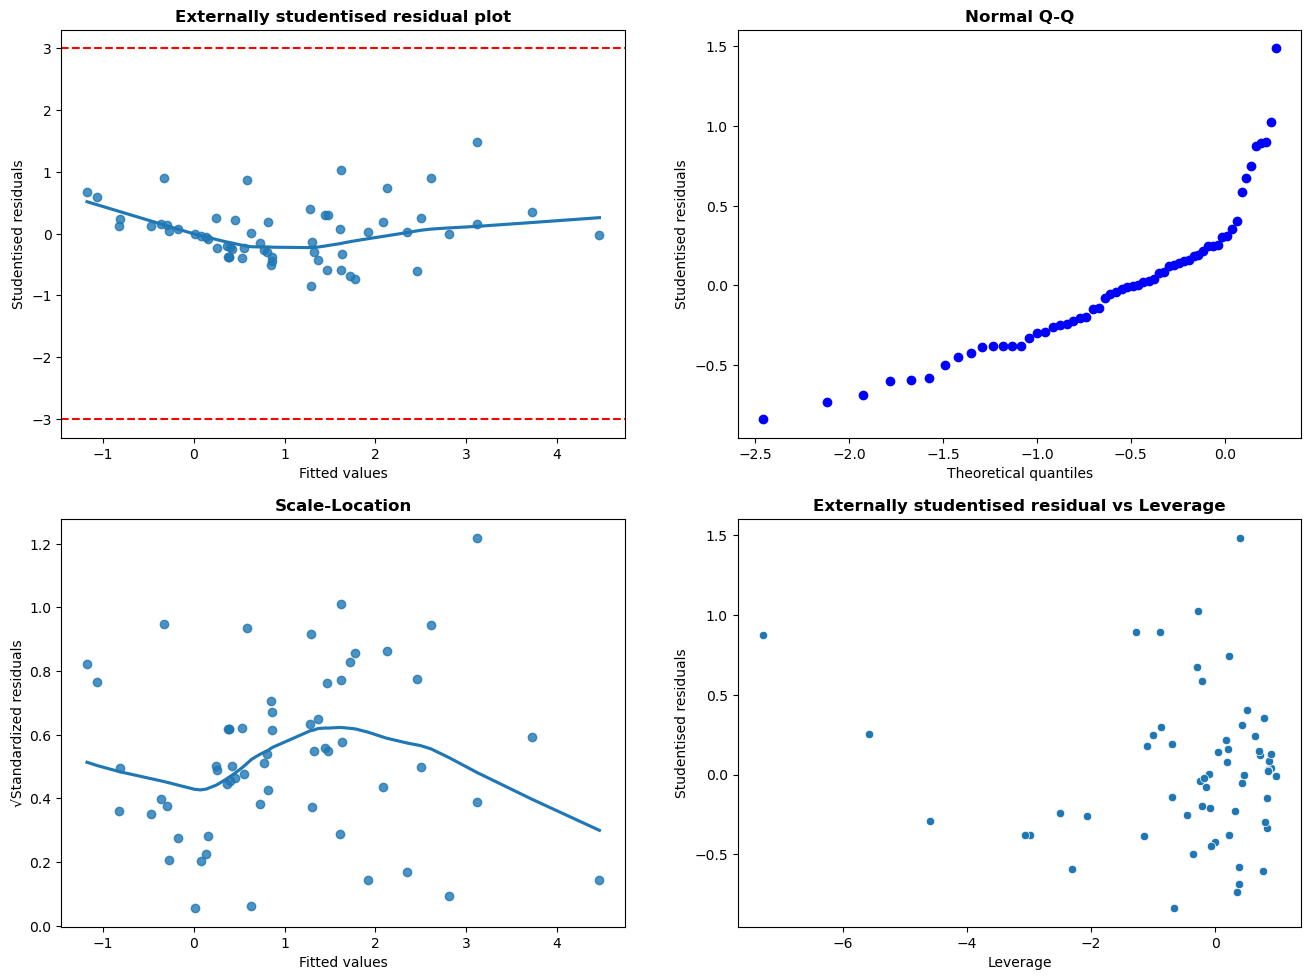

In [22]:
# Make predictions
y_pred = np.array(model.predict(X))

# Analyse residuals
lm_plot(lm_stats1(X, y, y_pred))

In [23]:
model.mse_total

1.833729248861869